<h1> Projeto 2 de Ciências de Dados </h1>

<h2> Grupo 20 </h2>
    <br>
    <h4> Integrantes: 
    <br>
    <br>
    <ul>
    <li> Venâncio Freitas </li>
    <br>
    <li> Welington Rodrigues </li>
    <br>
    <li> Henrique Puppi </li>
    <br>
    <li> Gabriel Fonseca </li>
    <br>
    </ul>
    </h4>

## 1. Visão Geral do Projeto 

### 1.1. Objetivo

 <p> O Trabalho em questão, envolverá a análise de uma base de dados na qual temos dados sociais sobre pessoas em situação de rua, a partir disso, iremos traçar o perfil envolvendo determinada situação de um desabrigado.</p>

### Motivações 

<p> Devido à crise global recente, motivada pela pandemia, o governo e a sociedade brasileira, passaram por dificuldades de manutenção da ordem nacional, principalmente em relação ao que tange o perfil socioeconômico. Assim, mostra-se relevante a análise do panorama desses moradores, para entender a situação de tais, como já citado. 

### Base de dados

<p> A base de dados que será analisada, trata-se de um Censo Realizado pela prefeitura de São Paulo no Ano de 2021, como já mencionado, e seu acesso é possível a partir do seguinte link: <a href='https://www.prefeitura.sp.gov.br/cidade/secretarias/assistencia_social/censo_2021/index.php?p=2007'> Censo 2021</a>
    
<h3> As features da base de dados são as seguintes: </h3>
<br>
<br>
<li> Situação de rua : Estado da Pessoa em relação à situação </li>
<li> Onde dormiu ontem: Local onde a pessoa dormiu no dia anterior ao dia de pesquisa </li> 
<li> Tempo de Permanencia: Tempo em que a pessoa passou nas ruas </li>
<li> Sexo: Sexo de nascença da pessoa </li> 
<li> Se identifica com o sexo de nascença:  Sexo ao qual a pessoa se identifica</li>
<li> Idade: Número da idade da pessoa </li> 
<li> Faixa de idade: Intervalo de 10 anos da idade da pessoa </li> 
<li> Classificação de idade: Classificação de idade da pessoa </li> 
<li> Cor_Raça_Etnia: Cor, raça, ou Etnia da pessoa </li> 
<li> Parentes no CA: Se a pessoa tem parentes em Centros de Acolhimento </li>
<li> Tempo na Situação: Tempo ao qual a pessoa encontra-se na situação ao qual ela está </li> 
<li> Tipo de Ponto: Tipo de local na rua ao qual ela encontra-se </li> 
<li> Presença_Moradia_Improvisada : Indica se a pessoa tem ou não moradia improvisada na sua situação </li> 
<li> Criança_acomp_adulto: Se tem criança acompanho de adulto entre o grupo consultado </li> 
<li> Criança_sozinha: Se tem uma criança sozinha na entrevista </li> 
<li> Latitude: Latitude da localidade ao qual a pessoa foi entrevistada </li> 
<li> Longitude: Longitude da pessoa entrevistada </li> 
<li> Data: Data ao qual foi feita a pesquisa </li> 
<li> Subprefeitura: Subprefeitura da cidade de São Paulo onde foi feita a entrevista </li> 
<li> Distrito: Divisão Administrativa do Município de São Paulo </li>

<br>
<br>

### Target

O Target de Análise será a coluna 'Situação de rua', a qual, a partir das análises feitas pelo grupo, será feita a predicao de perfil, para definir se a pessoa está na Rua ou em Centros de Acolhimentos.

In [3]:
%matplotlib inline
import pandas as pd
pd.options.mode.chained_assignment = None
from math import*
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
df_socio = pd.read_excel('socio.xlsx')
df_socio

,Cod_Reg,NOME_REG,COD_MUN,NOME_MUN,NOME_RM,CODRM,ANO,ESPVIDA,FECTOT,MORT1,...,T_FLFUND_TUDO,T_FLMED_TUDO,T_FLBAS_TUDO,T_FUND11A13_TUDO,I_ESCOLARIDADE,I_FREQ_PROP,IDHM,IDHM_E,IDHM_L,IDHM_R
0,335503001,Aricanduva / Vila Formosa,355030,São Paulo,RM São Paulo (SP),63500,2000,74.49,1.63,15.4,...,97.43,67.27,95.42,93.70,0.578,0.718,0.762,0.668,0.825,0.804
1,335503002,Butantã,355030,São Paulo,RM São Paulo (SP),63500,2000,75.53,1.68,13.8,...,96.18,60.39,93.51,87.79,0.635,0.680,0.789,0.665,0.842,0.876
2,335503003,Campo Limpo,355030,São Paulo,RM São Paulo (SP),63500,2000,74.37,2.01,15.6,...,94.18,48.53,90.86,87.20,0.481,0.582,0.699,0.546,0.823,0.760
3,335503004,Capela do Socorro,355030,São Paulo,RM São Paulo (SP),63500,2000,70.97,2.21,21.6,...,93.15,47.55,90.05,83.96,0.468,0.550,0.656,0.521,0.766,0.707
4,335503005,Casa Verde,355030,São Paulo,RM São Paulo (SP),63500,2000,74.59,1.85,15.2,...,95.33,58.11,92.79,89.05,0.550,0.652,0.732,0.616,0.827,0.769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,335503027,São Miguel Paulista,355030,São Paulo,RM São Paulo (SP),63500,2010,74.30,1.70,15.8,...,96.65,64.99,93.92,91.26,0.591,0.741,0.736,0.687,0.822,0.705
58,335503028,Sé,355030,São Paulo,RM São Paulo (SP),63500,2010,80.33,1.23,7.8,...,95.24,71.34,92.12,89.91,0.818,0.799,0.889,0.805,0.922,0.947
59,335503029,Vila Maria / Vila Guilherme,355030,São Paulo,RM São Paulo (SP),63500,2010,77.88,1.43,10.7,...,95.63,63.53,92.29,90.24,0.659,0.749,0.793,0.718,0.881,0.787
60,335503030,Vila Mariana,355030,São Paulo,RM São Paulo (SP),63500,2010,81.35,1.16,6.7,...,97.55,78.91,96.34,94.10,0.899,0.868,0.938,0.878,0.939,1.000


In [5]:
df_socio_2010 = df_socio[(df_socio.ANO == 2010)]
list(df_socio_2010.NOME_REG)

['Aricanduva / Vila Formosa',
 'Butantã',
 'Campo Limpo',
 'Capela do Socorro',
 'Casa Verde',
 'Cidade Ademar',
 'Cidade Tiradentes',
 'Ermelino Matarazzo',
 'Freguesia do Ó / Brasilândia',
 'Guaianases',
 'Ipiranga',
 'Itaim Paulista',
 'Itaquera',
 'Jabaquara',
 'Jaçanã / Tremembé',
 'Lapa',
 "M'Boi Mirim",
 'Mooca',
 'Parelheiros',
 'Penha',
 'Perus',
 'Pinheiros',
 'Pirituba / Jaraguá',
 'Santana / Tucuruvi',
 'Santo Amaro',
 'São Mateus',
 'São Miguel Paulista',
 'Sé',
 'Vila Maria / Vila Guilherme',
 'Vila Mariana',
 'Vila Prudente']

In [6]:
dict_replace = {
'Aricanduva / Vila Formosa': 'Aricanduva-Formosa-Carrão',
'Casa Verde': 'Casa Verde-Cachoeirinha',
'Freguesia do Ó / Brasilândia': 'Freguesia-Brasilândia',
'Jaçanã / Tremembé': 'Jaçanã-Tremembé',
'Pirituba / Jaraguá': 'Pirituba-Jaraguá',
'Santana / Tucuruvi': 'Santana-Tucuruvi',
'São Miguel Paulista': 'São Miguel',
'Vila Maria / Vila Guilherme': 'Vila Maria-Vila Guilherme',
}

df_socio_2010 = df_socio_2010.replace(dict_replace)

In [7]:
df_socio_2010.head(5)

,Cod_Reg,NOME_REG,COD_MUN,NOME_MUN,NOME_RM,CODRM,ANO,ESPVIDA,FECTOT,MORT1,...,T_FLFUND_TUDO,T_FLMED_TUDO,T_FLBAS_TUDO,T_FUND11A13_TUDO,I_ESCOLARIDADE,I_FREQ_PROP,IDHM,IDHM_E,IDHM_L,IDHM_R
31,335503001,Aricanduva-Formosa-Carrão,355030,São Paulo,RM São Paulo (SP),63500,2010,78.20,1.37,10.3,...,96.47,71.40,94.13,89.17,0.704,0.781,0.822,0.754,0.887,0.831
32,335503002,Butantã,355030,São Paulo,RM São Paulo (SP),63500,2010,79.70,1.35,8.5,...,96.49,63.04,92.71,88.91,0.731,0.753,0.859,0.746,0.912,0.932
33,335503003,Campo Limpo,355030,São Paulo,RM São Paulo (SP),63500,2010,78.00,1.55,10.5,...,96.29,58.66,92.80,90.72,0.603,0.707,0.783,0.670,0.883,0.810
34,335503004,Capela do Socorro,355030,São Paulo,RM São Paulo (SP),63500,2010,75.22,1.71,14.4,...,96.51,62.30,93.86,92.12,0.592,0.724,0.750,0.677,0.837,0.745
35,335503005,Casa Verde-Cachoeirinha,355030,São Paulo,RM São Paulo (SP),63500,2010,77.95,1.44,10.6,...,95.58,64.89,92.39,90.33,0.678,0.757,0.799,0.730,0.883,0.792


In [8]:
df_socio_2010.IDHM.value_counts()

0.758    2
0.869    2
0.822    1
0.716    1
0.938    1
0.793    1
0.889    1
0.736    1
0.732    1
0.909    1
0.787    1
0.942    1
0.731    1
0.804    1
0.680    1
0.906    1
0.859    1
0.768    1
0.816    1
0.725    1
0.824    1
0.713    1
0.762    1
0.777    1
0.708    1
0.799    1
0.750    1
0.783    1
0.785    1
Name: IDHM, dtype: int64

In [9]:
df_2010 = df_socio_2010.iloc[ : , 7:]
df_2010 = df_2010.iloc[: , 150:]
df_2010

,HOMEM65A69,HOMEM70A74,HOMEM75A79,HOMENS80,HOMEMTOT,MULH0A4,MULH10A14,MULH15A19,MULH20A24,MULH25A29,...,T_FLFUND_TUDO,T_FLMED_TUDO,T_FLBAS_TUDO,T_FUND11A13_TUDO,I_ESCOLARIDADE,I_FREQ_PROP,IDHM,IDHM_E,IDHM_L,IDHM_R
31,4087,3407,2484,2521,125639,6718,8688,8696,10669,11780,...,96.47,71.40,94.13,89.17,0.704,0.781,0.822,0.754,0.887,0.831
32,5432,4142,2726,2684,201879,12591,14698,14903,18913,21958,...,96.49,63.04,92.71,88.91,0.731,0.753,0.859,0.746,0.912,0.932
33,5004,3203,1787,1498,291001,22169,26912,24717,29086,31634,...,96.29,58.66,92.80,90.72,0.603,0.707,0.783,0.670,0.883,0.810
34,5314,3403,2030,1731,286040,20778,27141,25792,27899,29710,...,96.51,62.30,93.86,92.12,0.592,0.724,0.750,0.677,0.837,0.745
35,3474,2746,1902,1939,145058,9658,11760,11747,13830,15248,...,95.58,64.89,92.39,90.33,0.678,0.757,0.799,0.730,0.883,0.792
36,3707,2511,1566,1322,196149,14640,17745,17252,19882,20778,...,95.19,57.44,91.76,89.00,0.585,0.698,0.758,0.658,0.860,0.771
37,1319,770,342,255,100426,8571,10985,10097,10072,10534,...,96.47,60.01,93.84,89.88,0.598,0.700,0.708,0.664,0.798,0.670
38,2386,1735,1147,1116,98743,6542,8062,7924,9558,10000,...,97.09,67.54,94.42,94.59,0.656,0.783,0.777,0.738,0.850,0.747
39,4002,3003,2048,1980,193221,13583,17902,16766,18731,19785,...,97.22,60.72,94.30,92.34,0.635,0.722,0.762,0.692,0.854,0.748
40,2112,1407,775,694,129880,10035,13386,12599,13074,12845,...,96.36,60.79,92.63,91.66,0.554,0.721,0.713,0.660,0.807,0.681


<AxesSubplot:>

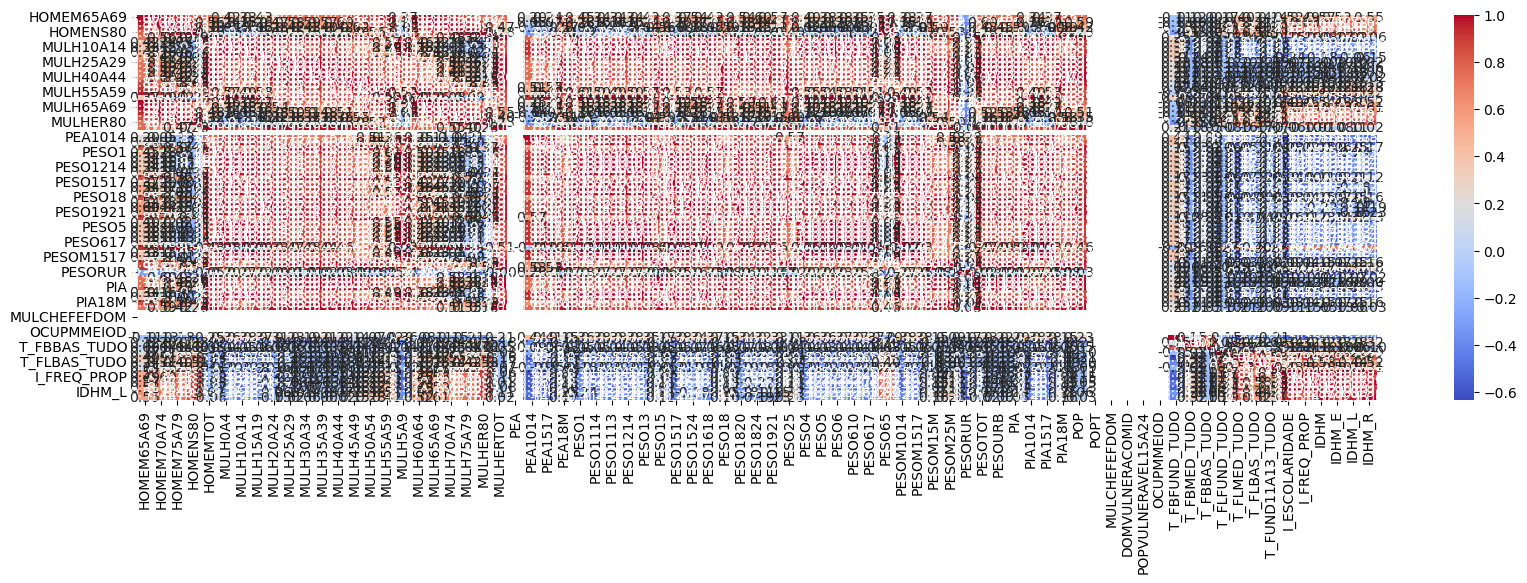

In [10]:
matriz = df_2010.corr()
plt.figure(figsize=(20,5))
sns.heatmap(matriz, annot=True, cmap="coolwarm", fmt=".2f")